<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#LeNet-5-识别手写数字图像的经典卷积神经网络-学习note" data-toc-modified-id="LeNet-5-识别手写数字图像的经典卷积神经网络-学习note-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>LeNet-5 识别手写数字图像的经典卷积神经网络 学习note</a></span></li><li><span><a href="#AlexNet" data-toc-modified-id="AlexNet-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>AlexNet</a></span></li></ul></div>

# LeNet-5 识别手写数字图像的经典卷积神经网络 学习note

<img src="photos\lenet.png" width="100%">

LeNet5通过巧妙的设计，利用**卷积、参数共享、池化等操作提取特征，避免了大量的计算成本**，最后再使用全连接神经网络进行分类识别

<img src="photos\leneT1.png" width="60%">

训练集长度 60000
测试集长度 10000
这是第 1轮训练，当前损失值 0.61447
第1轮测试结束，当前正确率:93 %
这是第 2轮训练，当前损失值 0.18538
第2轮测试结束，当前正确率:95 %
这是第 3轮训练，当前损失值 0.12875
第3轮测试结束，当前正确率:96 %
这是第 4轮训练，当前损失值 0.10456
第4轮测试结束，当前正确率:97 %
这是第 5轮训练，当前损失值 0.08912
第5轮测试结束，当前正确率:97 %
这是第 6轮训练，当前损失值 0.08141
第6轮测试结束，当前正确率:97 %
这是第 7轮训练，当前损失值 0.07479
第7轮测试结束，当前正确率:98 %
这是第 8轮训练，当前损失值 0.06948
第8轮测试结束，当前正确率:97 %
这是第 9轮训练，当前损失值 0.06501
第9轮测试结束，当前正确率:98 %
这是第 10轮训练，当前损失值 0.06197
第10轮测试结束，当前正确率:97 %
这是第 11轮训练，当前损失值 0.05950
第11轮测试结束，当前正确率:98 %
这是第 12轮训练，当前损失值 0.05618
第12轮测试结束，当前正确率:98 %
这是第 13轮训练，当前损失值 0.05497
第13轮测试结束，当前正确率:98 %
这是第 14轮训练，当前损失值 0.05220
第14轮测试结束，当前正确率:98 %
这是第 15轮训练，当前损失值 0.05113
第15轮测试结束，当前正确率:98 %
这是第 16轮训练，当前损失值 0.04796
第16轮测试结束，当前正确率:98 %
这是第 17轮训练，当前损失值 0.04771
第17轮测试结束，当前正确率:98 %
这是第 18轮训练，当前损失值 0.04626
第18轮测试结束，当前正确率:98 %
这是第 19轮训练，当前损失值 0.04505
第19轮测试结束，当前正确率:98 %
这是第 20轮训练，当前损失值 0.04331
第20轮测试结束，当前正确率:98 %


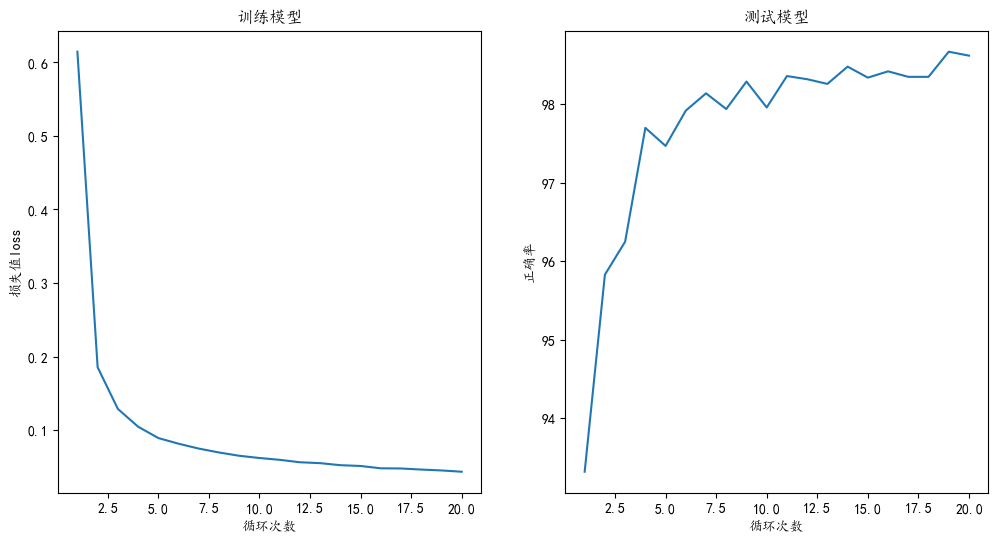

In [25]:
import torch
from torch import nn, optim
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

batch_size = 64
transform = transforms.Compose([
    transforms.ToTensor (),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST(root='../data/mnist', train=True, download=False, transform=transform)
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
test_dataset = datasets.MNIST(root='../data/mnist', train=False, download=False, transform=transform)
test_loader = DataLoader(test_dataset, shuffle=False, batch_size=batch_size)

print("训练集长度",len(train_dataset))
print("测试集长度",len(test_dataset))

# 模型类设计
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.mode = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1),
            nn.MaxPool2d(kernel_size=2),
            nn.Flatten(),
            nn.Linear(in_features=4*4*16, out_features=120),
            nn.Linear(in_features=120, out_features=84),
            nn.Linear(in_features=84, out_features=10),
    )
    
    def forward(self, input):
        x = self.mode(input)
        return x

model = LeNet5()
model.to(device)
# 损失函数
criterion = torch.nn.CrossEntropyLoss()
# 优化器
optimizer = optim.SGD(model.parameters(), lr=0.01)

def train(epoch):
    runing_loss = 0.0
    for i, data in enumerate(train_loader):
        x, y = data
        x, y = x.to(device), y.to(device)

        # 清零 正向传播  损失函数  反向传播 更新
        optimizer.zero_grad()
        y_pre = model(x)
        loss = criterion(y_pre, y)
        loss.backward()
        optimizer.step()
        runing_loss += loss.item()
    # 每轮训练一共训练1W个样本，这里的runing_loss是1W个样本的总损失值，要看每一个样本的平均损失值， 记得除10000

    print("这是第 %d轮训练，当前损失值 %.5f" % (epoch + 1, runing_loss / 938))

    return runing_loss / 938

def test(epoch):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            x, y = data
            x, y = x.to(device), y.to(device)
            pre_y = model(x)
            # 这里拿到的预测值 每一行都对应10个分类，这10个分类都有对应的概率，
            # 我们要拿到最大的那个概率和其对应的下标。

            j, pre_y = torch.max(pre_y.data, dim=1)  # dim = 1 列是第0个维度，行是第1个维度

            total += y.size(0)  # 统计方向0上的元素个数 即样本个数

            correct += (pre_y == y).sum().item()  # 张量之间的比较运算
    print("第%d轮测试结束，当前正确率:%d %%" % (epoch + 1, correct / total * 100))
    return correct / total * 100

if __name__ == '__main__':
    plt_epoch = []
    loss_ll = []
    corr = []
    for epoch in range(20):
        plt_epoch.append(epoch+1) # 方便绘图
        loss_ll.append(train(epoch)) # 记录每一次的训练损失值 方便绘图
        corr.append(test(epoch)) # 记录每一次的正确率

    plt.rcParams['font.sans-serif'] = ['KaiTi']
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.title("训练模型")
    plt.plot(plt_epoch,loss_ll)
    plt.xlabel("循环次数")
    plt.ylabel("损失值loss")


    plt.subplot(1,2,2)
    plt.title("测试模型")
    plt.plot(plt_epoch,corr)
    plt.xlabel("循环次数")
    plt.ylabel("正确率")
    plt.show()



---

# AlexNet